<a href="https://colab.research.google.com/github/ayushbond007/BOOK-recommender-system/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd


In [6]:
ratings= pd.read_csv("/content/drive/MyDrive/ratings.csv")
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
x = pd.read_csv("/content/drive/MyDrive/books.csv")
y = pd.read_csv("/content/drive/MyDrive/book_data.csv")

In [8]:
x.drop(["work_text_reviews_count","work_ratings_count","best_book_id","work_id","books_count"],axis= "columns",inplace=True)

In [9]:
y.drop(["book_authors","book_edition","book_format","book_isbn","book_rating","book_rating_count","book_review_count","image_url"],axis= "columns",inplace=True)

In [10]:
y.rename(columns={"book_desc":"snippet","book_title":"original_title","genres":"genre"},inplace=True)

In [11]:


finalbooks=x.merge(y,on="original_title")

finalbooks['genre'] = finalbooks['genre'].fillna('Unknown')
finalbooks['firstgenre']= [x.split('|')[0] for x in finalbooks['genre']]

In [12]:
finalbooks['first_author']= [x.split('|')[0] for x in finalbooks['authors']]

In [13]:
finalbooks.head(2)

,book_id,goodreads_book_id,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,snippet,book_pages,genre,firstgenre,first_author
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,Suzanne Collins
1,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Winning will make you famous.Losing means cert...,454 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,Suzanne Collins


In [14]:
ratings['book_id'].value_counts().head(45)
out = ratings.groupby(by= 'book_id', as_index=False).agg({'rating':pd.Series.count})
outid = out.loc[out.rating >= 7500]['book_id'].tolist()
testbooks = finalbooks[~finalbooks["book_id"].isin(outid)]
testratings = ratings[~ratings["book_id"].isin(outid)]

In [15]:
useronly=ratings.groupby(by= 'user_id', as_index=False).agg({'rating':pd.Series.count}).sort_values('rating',ascending = False).head(15000)

In [16]:
finalratings = ratings[ratings.user_id.isin(useronly.user_id)]
bookonly = finalratings.groupby(by= 'book_id', as_index=False).agg({'rating':pd.Series.count}).sort_values('rating',ascending = False).head(8000)
finalratings = finalratings[ratings.book_id.isin(bookonly.book_id)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
finalbooks = finalbooks[finalbooks.book_id.isin(bookonly.book_id)]
finalbooks = finalbooks.reset_index(drop=True)
finalbooks["newbookid"] = finalbooks.index + 1
finalbooks

,book_id,goodreads_book_id,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,snippet,book_pages,genre,firstgenre,first_author,newbookid
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,Suzanne Collins,1
1,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Winning will make you famous.Losing means cert...,454 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,Suzanne Collins,2
2,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,Suzanne Collins,3
3,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Sometime in the future after the destruction o...,436 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,Suzanne Collins,4
4,3,41865,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,About three things I was absolutely positive.F...,498 pages,Young Adult|Fantasy|Romance|Paranormal|Vampire...,Young Adult,Stephenie Meyer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8440,9984,764165,140255087,9.780140e+12,Peter Matthiessen,1978.0,The Snow Leopard,The Snow Leopard,eng,4.12,8502,145,406,1586,3393,4002,https://images.gr-assets.com/books/1309211772m...,https://images.gr-assets.com/books/1309211772s...,When Matthiessen went to Nepal to study the Hi...,352 pages,Travel|Nonfiction|Environment|Nature|Autobiogr...,Travel,Peter Matthiessen,8441
8441,9990,294081,140143912,9.780140e+12,Oscar Hijuelos,1989.0,The Mambo Kings Play Songs of Love,The Mambo Kings Play Songs of Love,eng,3.68,9107,374,836,2692,3513,2361,https://images.gr-assets.com/books/1330072994m...,https://images.gr-assets.com/books/1330072994s...,"A Pulitzer Prize winning, bestselling sensatio...",407 pages,Fiction|Music,Fiction,Oscar Hijuelos,8442
8442,9995,15613,1416523723,9.781417e+12,Herman Melville,1924.0,"Billy Budd, Sailor","Billy Budd, Sailor",eng,3.09,10866,1478,2225,3805,2985,1617,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,A handsome young sailor is unjustly accused of...,160 pages,Classics|Fiction|Literature|Historical|Histori...,Classics,Herman Melville,8443
8443,9996,7130616,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,17204,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,"The Edge lies between worlds, on the border be...",447 pages,Fantasy|Urban Fantasy|Fantasy|Romance|Fantasy|...,Fantasy,Ilona Andrews,8444


In [18]:
finalratings = finalratings.merge(finalbooks[['book_id','newbookid']], how='left', on= ['book_id'])
finalratings

,user_id,book_id,rating,newbookid
0,4,70,4,286.0
1,4,70,4,287.0
2,4,70,4,288.0
3,4,70,4,289.0
4,4,264,3,867.0
...,...,...,...,...
4500989,49925,510,5,1322.0
4500990,49925,528,4,NaN
4500991,49925,722,4,NaN
4500992,49925,949,5,2025.0


In [19]:
finalratings['newuser_id'] = finalratings.groupby('user_id').grouper.group_info[0]+1
finalratings

,user_id,book_id,rating,newbookid,newuser_id
0,4,70,4,286.0,1
1,4,70,4,287.0,1
2,4,70,4,288.0,1
3,4,70,4,289.0,1
4,4,264,3,867.0,1
...,...,...,...,...,...
4500989,49925,510,5,1322.0,14274
4500990,49925,528,4,NaN,14274
4500991,49925,722,4,NaN,14274
4500992,49925,949,5,2025.0,14274


In [20]:
finalratings = finalratings.drop(['user_id','book_id'], axis=1)
finalbooks = finalbooks.drop(['book_id', 'goodreads_book_id'], axis=1)

In [21]:
ratings['good'] =[1 if x >= 4 else 0 for x in ratings['rating']]

In [22]:
import matplotlib.pyplot as plt


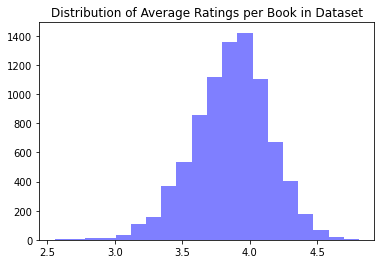

In [23]:
# Average Ratings for the books in the Data Base
agg = finalratings.groupby(by= 'newbookid', as_index=False).agg({'rating':pd.Series.mean})
n, bins, patches = plt.hist(agg['rating'], 20, facecolor='blue', alpha=0.5)
plt.title('Distribution of Average Ratings per Book in Dataset')
plt.show()


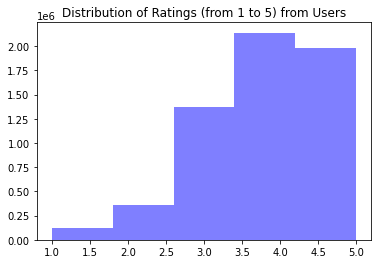

In [24]:
# Distribution of the individual ratings given by our User Base

n, bins, patches = plt.hist(ratings['rating'], 5, facecolor='blue', alpha=0.5)
plt.title('Distribution of Ratings (from 1 to 5) from Users')
plt.show()


In [25]:
import seaborn as sns

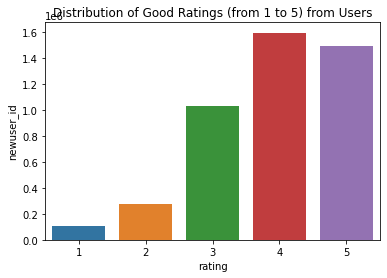

In [26]:
# Distribution of the individual ratings given by our User Base
distr = finalratings.groupby(by= 'rating', as_index=False).agg({'newuser_id':pd.Series.count}) 
sns.barplot(x="rating" , y="newuser_id",  data=distr)
plt.title('Distribution of Good Ratings (from 1 to 5) from Users')
plt.show()

In [27]:
# Distribution of the # of Ratings per User

ratings['rating'].value_counts()
#testratings['user_id'].max()

4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: rating, dtype: int64

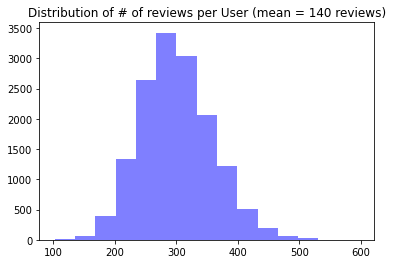

In [28]:
# Distribution of the # of Ratings per User

n, bins, patches = plt.hist(finalratings['newuser_id'].value_counts(), 15, facecolor='blue', alpha=0.5)
plt.title('Distribution of # of reviews per User (mean = 140 reviews)')
plt.show()

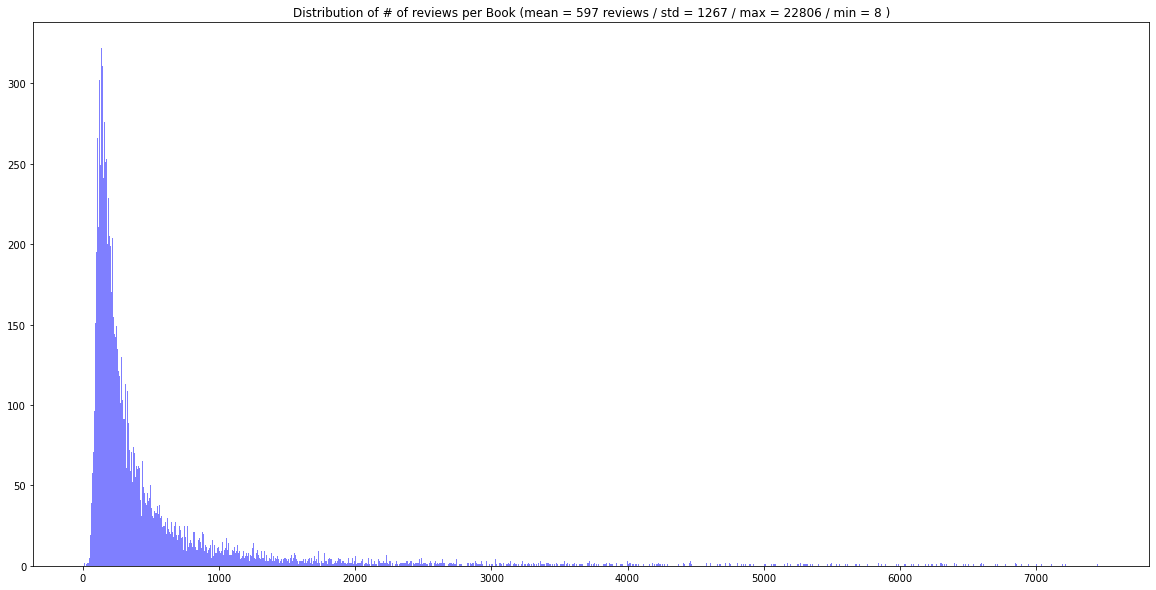

In [29]:
# Distribution of the # of Ratings per Book
facet, axes = plt.subplots(1, 1, figsize=(20, 10))
n, bins, patches = plt.hist(testratings['book_id'].value_counts(), 1000, facecolor='blue', alpha=0.5 )   #log= True
plt.title('Distribution of # of reviews per Book (mean = 597 reviews / std = 1267 / max = 22806 / min = 8 )')
plt.show()

In [30]:
testbooks['genre'] = testbooks['genre'].fillna('Unknown')
testbooks['firstgenre']= [x.split('|')[0] for x in testbooks['genre']]

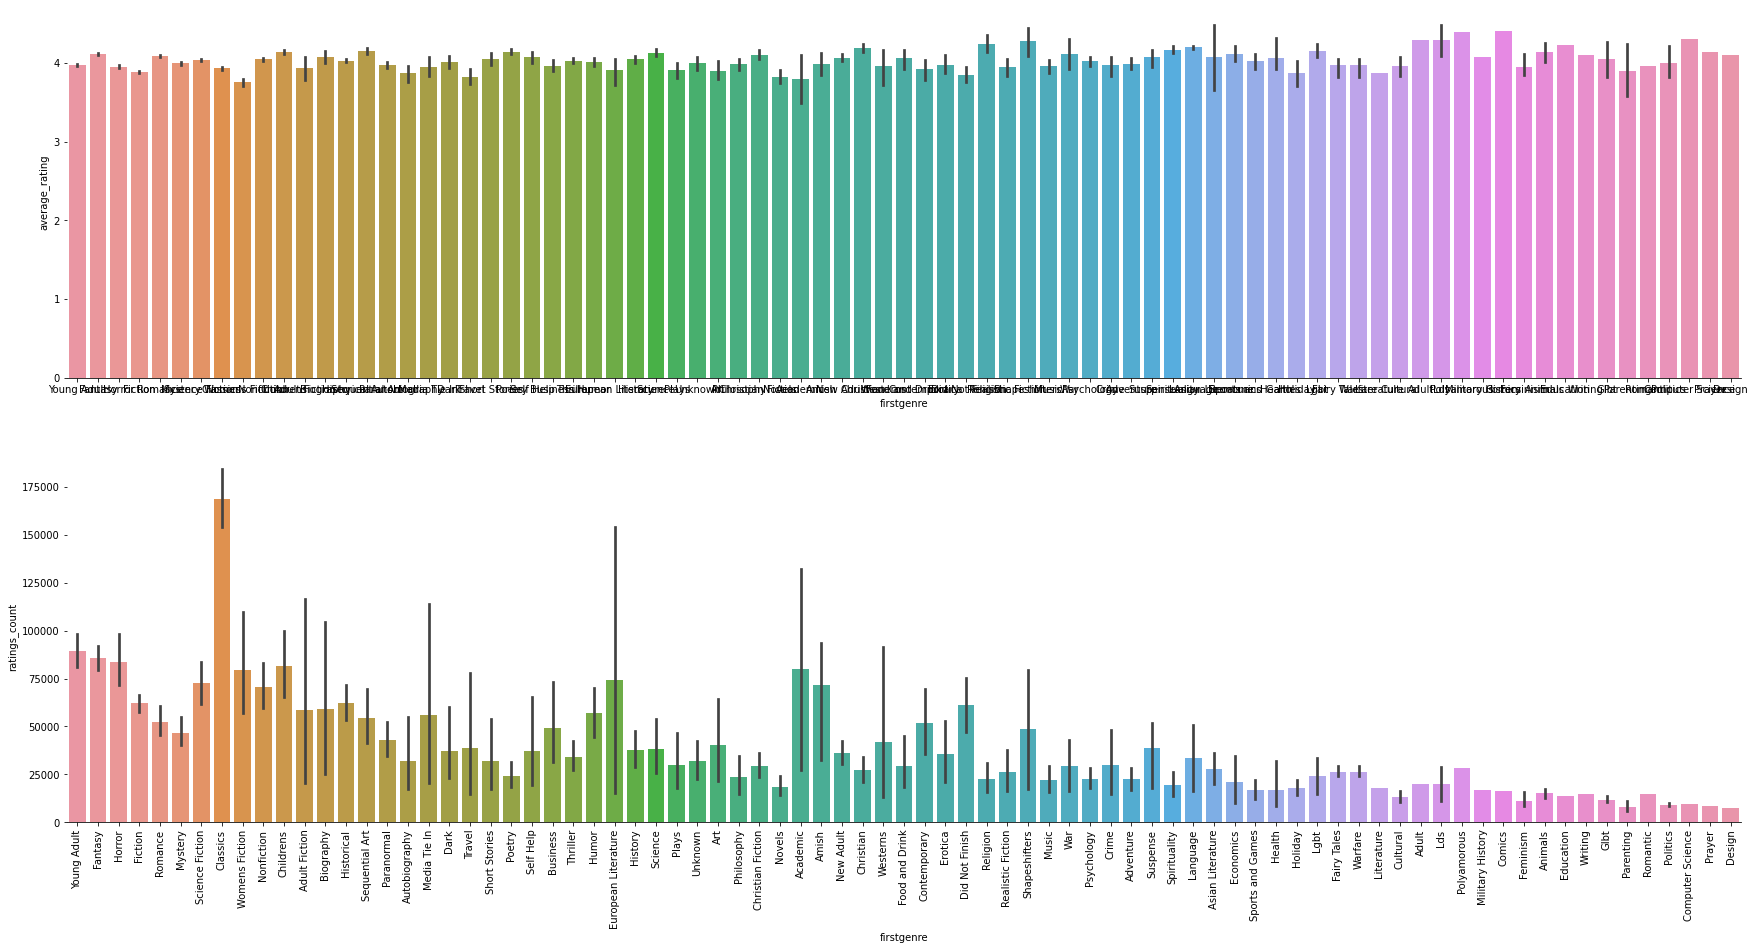

In [31]:
# Distribution of the # of Ratings per Book
facet, axes = plt.subplots(2, 1, figsize=(30, 15))
sns.despine(left=True)
sns.barplot(x="firstgenre", y="average_rating",  data=testbooks,  ax=axes[0])
plt.xticks(rotation=90)
sns.barplot(x="firstgenre", y="ratings_count",  data=testbooks,  ax=axes[1])
plt.xticks(rotation=90)

plt.show()

In [32]:
finalbooks.to_csv("final.csv")